

# Linear SVM

## Step1: Define a linearly separable dataset

Let's define a helper function to visualize the dataset and the resulting model (**only for a two-dimensional dataset**).

In [ ]:
from matplotlib.axis import YTick
from matplotlib.colors import ListedColormap

def plot_data(X, y, model=None, sp_v_i=None):

    # hyperparameter for boardry
    x_min = 0
    x_max = 4
    y_min = 0
    y_max = 6
    step = 0.05

    if model and sp_v_i:
      # Retrieve the model parameters.
      b = model.intercept_
      w1, w2 = model.coef_.T

      # Calculate the intercept and gradient of the decision boundary.
      c = -b/w2
      m = -w1/w2

      # set plot limits
      plt.xlim([x_min, x_max])
      plt.ylim([y_min, y_max])

      xd = np.array([x_min, x_max])
      yd = m*xd + c
      plt.plot(xd, yd, 'k', lw=1, ls='--')
      plt.fill_between(xd, yd, y_min, color='tab:blue', alpha=0.2)
      plt.fill_between(xd, yd, y_max, color='tab:orange', alpha=0.2)

      # set title
      plt.title("Linear SVM")

      plt.scatter(X[sp_v_i][:, 0], X[sp_v_i][:, 1], s=200,
                c="black", marker="o", label="support vector")

      plt.legend()

    # When the label y is 0, the class is represented with a blue square.
    # When the label y is 1, the class is represented with a green triangle.
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.plot(X[:, 0][y==-1], X[:, 1][y==-1], "rx")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.plot(X[:, 0][y==-1], X[:, 1][y==-1], "rx")

    plt.show()

Next, we generate a **linearly separable** dataset using sklearn library.

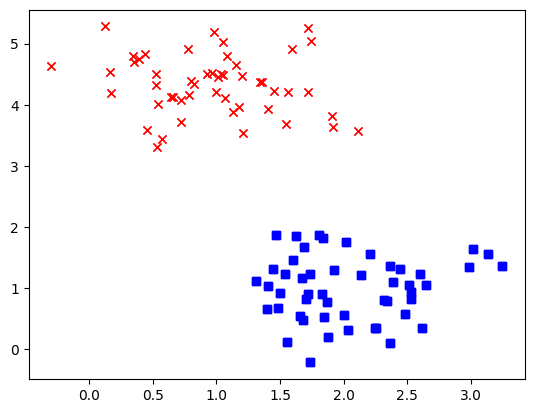

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2, n_features=2,random_state=0, cluster_std=0.5)

# change labels from 0 to -1
y[y==0] = -1

plot_data(X, y)

In [ ]:
y = y.astype(float)

## Step 2:  

*   Implementing the QP programming using the CVXOPT library
*   Implementing a way determine the support vectors


Linear SVM

In [ ]:
from cvxopt import matrix, solvers
import numpy as np

class SVM():

    def __init__(self):
        self.has_fitted = False

    def fit(self, X, y):
        assert len(X) > 0, "Please input at least one sample"

        # specify the shape
        n = len(X)
        X_d = len(X[0])

        # initialize variables
        self.P = matrix(np.identity(X_d + 1, dtype=float))
        self.q = matrix(np.zeros((X_d + 1,), dtype=float))
        self.G = matrix(np.zeros((n, X_d + 1), dtype=float))
        self.h = -matrix(np.ones((n,), dtype=float))

        # dump the data into variables
        # P
        self.P[0, 0] = 0

        for i in range(n):
            self.G[i, 0] = -y[i]
            self.G[i, 1:] = -X[i, :] * y[i]

        sol = solvers.qp(self.P, self.q, self.G, self.h)

        print(f"b = {sol['x'][0]}\nw1 = {sol['x'][1]}\nw2 = {sol['x'][2]}")

        # find the solution
        self.coef_ = np.zeros(X_d,) # weight
        self.intercept_ = sol["x"][0] # bias
        for i in range(1, X_d + 1):
            self.coef_[i - 1] = sol["x"][i]

        self.has_fitted = True
        return self.coef_, self.intercept_

    def predict(self, X):
        assert self.has_fitted, "Model has not been trained"
        return np.sign(np.dot(self.coef_, X.T) + self.intercept_)

In [ ]:
def get_spv_i(model, X, y):
  sp_v_i = []
  n = len(X)
  threshold = 1e-4

  for i in range(n):
    v = y[i] * (np.dot(model.coef_, X[i]) + model.intercept_)
    if v < (1 + threshold):
     sp_v_i.append(i)
  return sp_v_i


## Step 3: Plot the decision boundary, margins, and support vectors to visualize the classification.

     pcost       dcost       gap    pres   dres
 0:  1.3873e-01  1.9813e+01  2e+02  2e+00  3e+02
 1:  1.0612e+00 -1.9494e+01  2e+01  2e-01  3e+01
 2:  1.2118e+00  3.1209e-01  9e-01  7e-16  2e-14
 3:  8.2689e-01  5.9417e-01  2e-01  6e-16  4e-15
 4:  8.1924e-01  7.4021e-01  8e-02  5e-16  4e-15
 5:  8.0320e-01  8.0210e-01  1e-03  5e-16  7e-15
 6:  8.0295e-01  8.0294e-01  1e-05  5e-16  2e-14
 7:  8.0294e-01  8.0294e-01  1e-07  6e-16  4e-15
Optimal solution found.
b = 3.0307343392462904
w1 = 0.20839948113834678
w2 = -1.2499834369222558


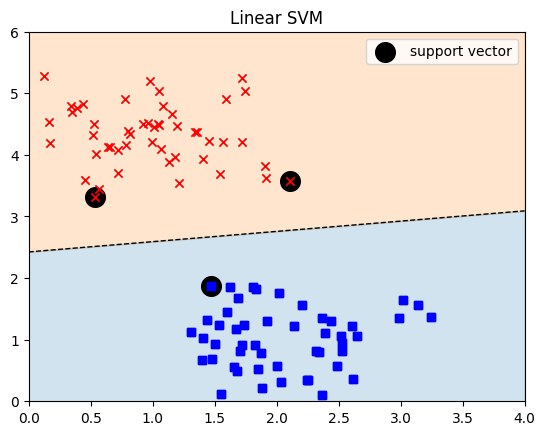

In [ ]:
model = SVM()
model.fit(X, y)
sp_v_i = get_spv_i(model=model, X=X, y=y)
plot_data(X, y, model, sp_v_i)

## Step 4: Compare with Scikit-learn.

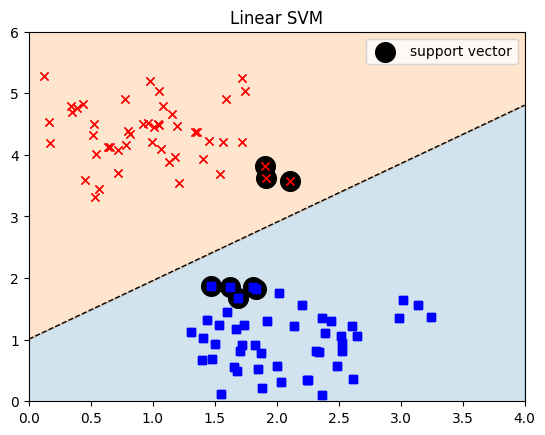

In [ ]:
from sklearn.svm import LinearSVC

model = LinearSVC()

model.fit(X, y)
sp_v_i = get_spv_i(model=model, X=X, y=y)
plot_data(X, y, model, sp_v_i)